In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [118]:
df=pd.read_csv("/content/amazon_sales_data 2025.csv")

In [119]:
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [120]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [121]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [122]:
df['Date']=pd.to_datetime(df['Date'])

In [123]:
# Convert 'Price', 'Quantity', and 'Total Sales' columns to numeric
for col in ['Price', 'Quantity', 'Total Sales']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-05-03,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,2025-08-03,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [124]:
df['Status'].unique()

array(['Cancelled', 'Pending', 'Completed'], dtype=object)

In [125]:
df1=df.copy()

In [126]:
df1['Status'].unique()

array(['Cancelled', 'Pending', 'Completed'], dtype=object)

# Exploratory Data Analysis (EDA)

In [127]:
# Group by date and sum total sales
daily_sales = df1.groupby('Date')['Total Sales'].sum()

# Resample to monthly and yearly frequency
monthly_sales = daily_sales.resample('ME').sum()
yearly_sales = daily_sales.resample('YE').sum()

print("Daily Sales:")
print(daily_sales)

print("\nMonthly Sales:")
print(monthly_sales)

print("\nYearly Sales:")
yearly_sales


Daily Sales:
Date
2025-01-03     1800
2025-01-04      320
2025-02-02     3600
2025-02-03     4575
2025-02-04     3100
2025-02-13     4860
2025-02-14     1015
2025-02-15      520
2025-02-16     9540
2025-02-17     1005
2025-02-18     8810
2025-02-19     2195
2025-02-20     6730
2025-02-21     4600
2025-02-22     1800
2025-02-23     2570
2025-02-24     6900
2025-02-25     6300
2025-02-26     1980
2025-02-27      300
2025-02-28     7210
2025-03-02     3360
2025-03-03      120
2025-03-13     4160
2025-03-14     4350
2025-03-15     7190
2025-03-16     2735
2025-03-17      540
2025-03-18     3700
2025-03-19     4115
2025-03-20     3630
2025-03-21     1960
2025-03-22      950
2025-03-23     3900
2025-03-24     9520
2025-03-25     6015
2025-03-26     2970
2025-03-27       15
2025-03-28     2400
2025-03-29     2600
2025-03-30     7465
2025-03-31     6600
2025-04-02     6815
2025-04-03     5900
2025-05-02     5400
2025-05-03     2900
2025-06-02    11400
2025-06-03     9720
2025-07-02     2520
20

,Total Sales
Date,
2025-12-31,243845


In [128]:
# Calculate moving averages
window_size = 7  # Example window size for a 7-day moving average

daily_sales_ma = daily_sales.rolling(window=window_size).mean()
monthly_sales_ma = monthly_sales.rolling(window=window_size).mean()
yearly_sales_ma = yearly_sales.rolling(window=window_size).mean()

print("\nDaily Sales Moving Average:")
print(daily_sales_ma)

print("\nMonthly Sales Moving Average:")
print(monthly_sales_ma)

print("\nYearly Sales Moving Average:")
yearly_sales_ma



Daily Sales Moving Average:
Date
2025-01-03            NaN
2025-01-04            NaN
2025-02-02            NaN
2025-02-03            NaN
2025-02-04            NaN
2025-02-13            NaN
2025-02-14    2752.857143
2025-02-15    2570.000000
2025-02-16    3887.142857
2025-02-17    3516.428571
2025-02-18    4121.428571
2025-02-19    3992.142857
2025-02-20    4259.285714
2025-02-21    4771.428571
2025-02-22    4954.285714
2025-02-23    3958.571429
2025-02-24    4800.714286
2025-02-25    4442.142857
2025-02-26    4411.428571
2025-02-27    3492.857143
2025-02-28    3865.714286
2025-03-02    4088.571429
2025-03-03    3738.571429
2025-03-13    3347.142857
2025-03-14    3068.571429
2025-03-15    3812.857143
2025-03-16    4160.714286
2025-03-17    3207.857143
2025-03-18    3256.428571
2025-03-19    3827.142857
2025-03-20    3751.428571
2025-03-21    3410.000000
2025-03-22    2518.571429
2025-03-23    2685.000000
2025-03-24    3967.857143
2025-03-25    4298.571429
2025-03-26    4135.000000
2025

,Total Sales
Date,
2025-12-31,NaN


In [129]:
# Top-selling categories/products
top_categories = df1.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

print("\nTop-selling categories:")
print(top_categories.head(10))  # Display top 10


Top-selling categories:
Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64


In [130]:
# Price distribution by category
price_distribution = df1.groupby('Category')['Price'].describe()
print("\nPrice distribution by category:")
print(price_distribution)


Price distribution by category:
                 count        mean         std    min    25%     50%     75%  \
Category                                                                       
Books             25.0   15.000000    0.000000   15.0   15.0    15.0    15.0   
Clothing          40.0   30.000000   10.127394   20.0   20.0    30.0    40.0   
Electronics      118.0  375.423729  269.436398  100.0  150.0   325.0   500.0   
Footwear          27.0   60.000000    0.000000   60.0   60.0    60.0    60.0   
Home Appliances   40.0  960.000000  297.683363  600.0  600.0  1200.0  1200.0   

                    max  
Category                 
Books              15.0  
Clothing           40.0  
Electronics       800.0  
Footwear           60.0  
Home Appliances  1200.0  


In [131]:
# Quantity vs price analysis (example: correlation)
correlation = df1['Quantity'].corr(df1['Price'])
print("\nCorrelation between Quantity and Price:")
correlation


Correlation between Quantity and Price:


np.float64(-0.010858214209771202)

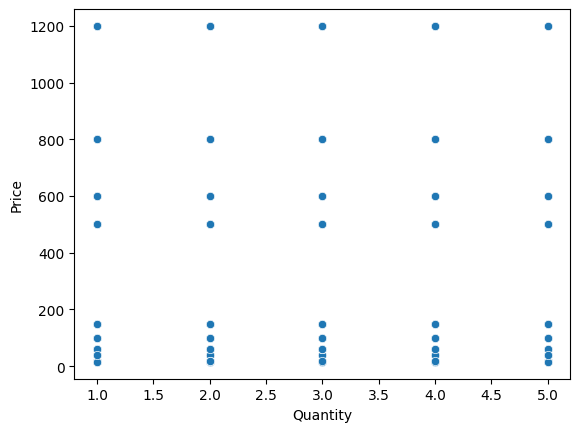

In [132]:
sns.scatterplot(x='Quantity', y='Price',data=df1)
plt.show()

In [133]:
df1.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

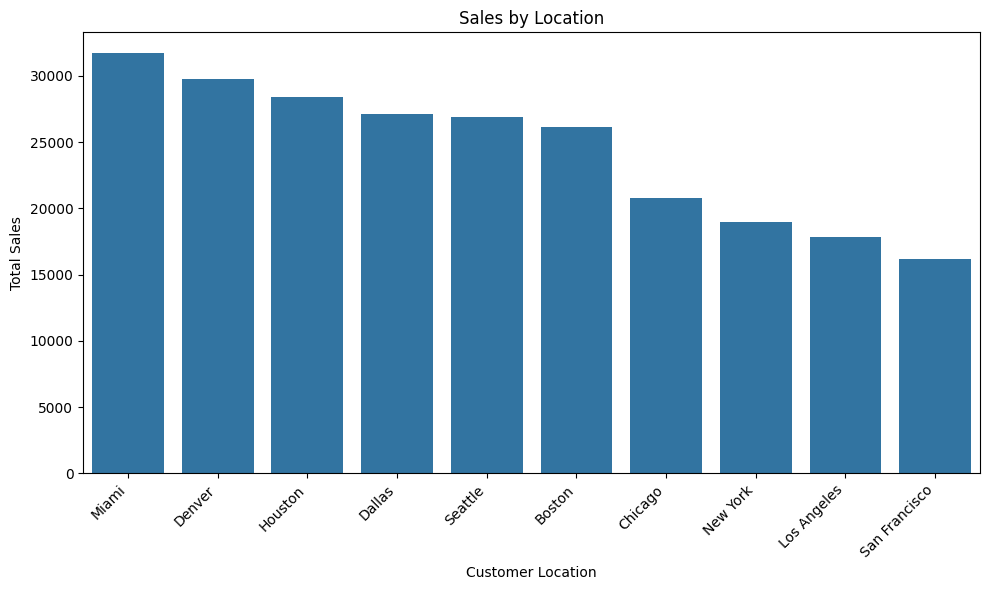

In [134]:
# Sales by location
sales_by_location = df1.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_location.index, y=sales_by_location.values)
plt.xlabel("Customer Location")
plt.ylabel("Total Sales")
plt.title("Sales by Location")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



Repeat Customers:
Customer Name
Emma Clark       32
Jane Smith       30
Olivia Wilson    29
David Lee        26
John Doe         26
Michael Brown    24
Daniel Harris    23
Emily Johnson    22
Chris White      22
Sophia Miller    16
Name: count, dtype: int64


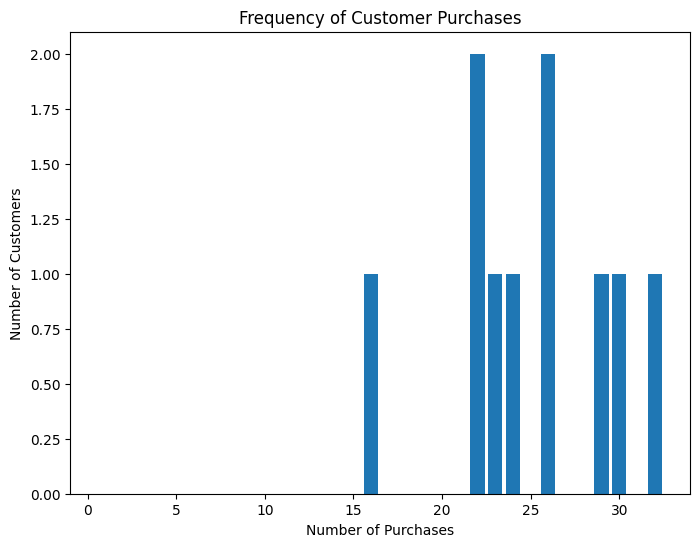

In [135]:
# Repeat customers
customer_counts = df1['Customer Name'].value_counts()
repeat_customers = customer_counts[customer_counts > 1]
print("\nRepeat Customers:")
print(repeat_customers)

plt.figure(figsize=(8, 6))
plt.hist(customer_counts, bins=range(1, customer_counts.max() + 2), align='left', rwidth=0.8) # Use a histogram for better visualization of repeat customers
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.title("Frequency of Customer Purchases")
plt.show()

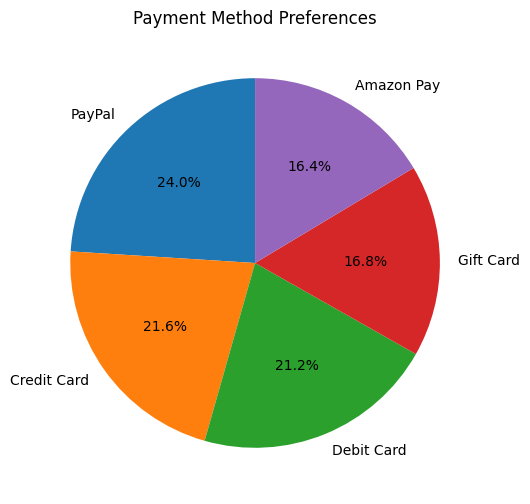

In [136]:

# Payment method preferences
payment_preferences = df1['Payment Method'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(payment_preferences, labels=payment_preferences.index, autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Preferences")
plt.show()

In [137]:
# Calculate the number of completed orders
completed_orders = len(df1[df1['Status'] == 'Completed'])

# Calculate the number of canceled orders
canceled_orders = len(df[df['Status'].isin(['Cancelled'])])

# Calculate the number of Pending orders
Pending_orders = len(df[df['Status'].isin(['Pending'])])
print("Number of Completed Orders:", completed_orders)
print("Number of Pending Orders:", Pending_orders)
print("Number of Canceled/Refunded Orders:", canceled_orders)

Number of Completed Orders: 88
Number of Pending Orders: 85
Number of Canceled/Refunded Orders: 77


Feature Engineering (for modeling)

In [138]:
# Extract date features
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.isocalendar().week

# High-value order flag
df['High Value Order'] = df['Total Sales'] > 1000  # Customize threshold

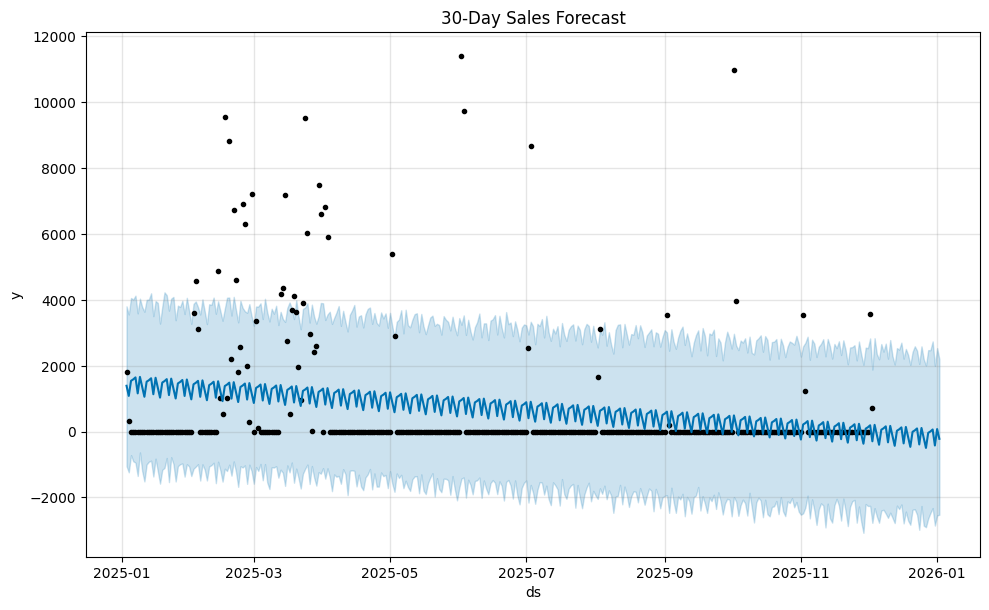

In [139]:
model.plot(forecast)
plt.title("30-Day Sales Forecast")
plt.show()

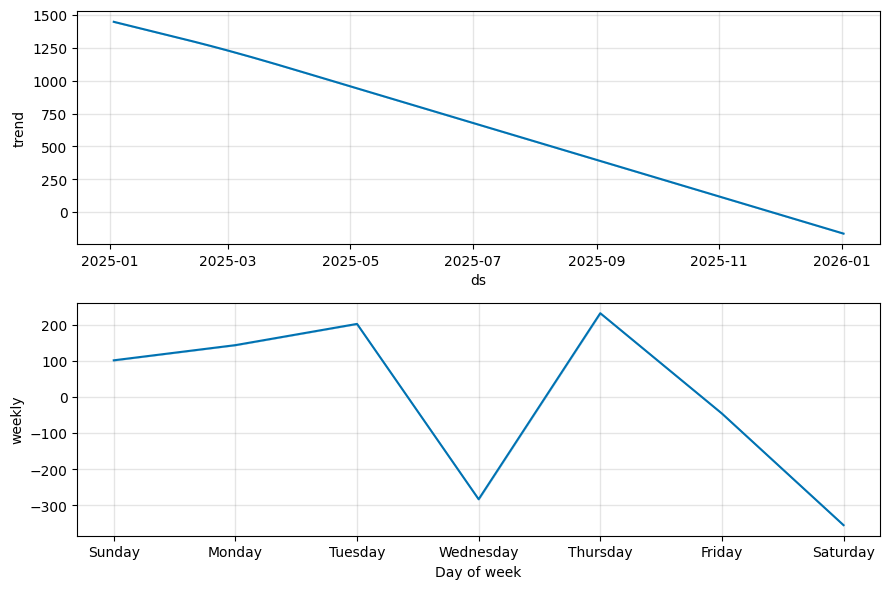

In [140]:
model.plot_components(forecast)
plt.show()